# Linear Regression Checkpoint

This checkpoint is designed to test your understanding of linear regression.

Specifically, this will cover:

* Creating simple and multiple linear regression models with StatsModels
* Interpreting linear regression model metrics
* Interpreting linear regression model parameters

## Your Task: Build Linear Regression Models to Predict Home Prices

### Data Understanding

You will be using the Ames Housing dataset, modeling the `SalePrice` using these numeric features:

* `GrLivArea`: Above grade living area (square feet)
* `GarageArea`: Size of garage (square feet)
* `LotArea`: Lot size (square feet)
* `LotFrontage`: Length of street connected to property (feet)

In [47]:
# Run this cell without changes
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("ames.csv", index_col=0)
df = df[["SalePrice", "GrLivArea", "GarageArea", "LotArea", "LotFrontage"]].copy()
df

,SalePrice,GrLivArea,GarageArea,LotArea,LotFrontage
Id,,,,,
1,208500,1710,548,8450,65.0
2,181500,1262,460,9600,80.0
3,223500,1786,608,11250,68.0
4,140000,1717,642,9550,60.0
5,250000,2198,836,14260,84.0
...,...,...,...,...,...
1456,175000,1647,460,7917,62.0
1457,210000,2073,500,13175,85.0
1458,266500,2340,252,9042,66.0


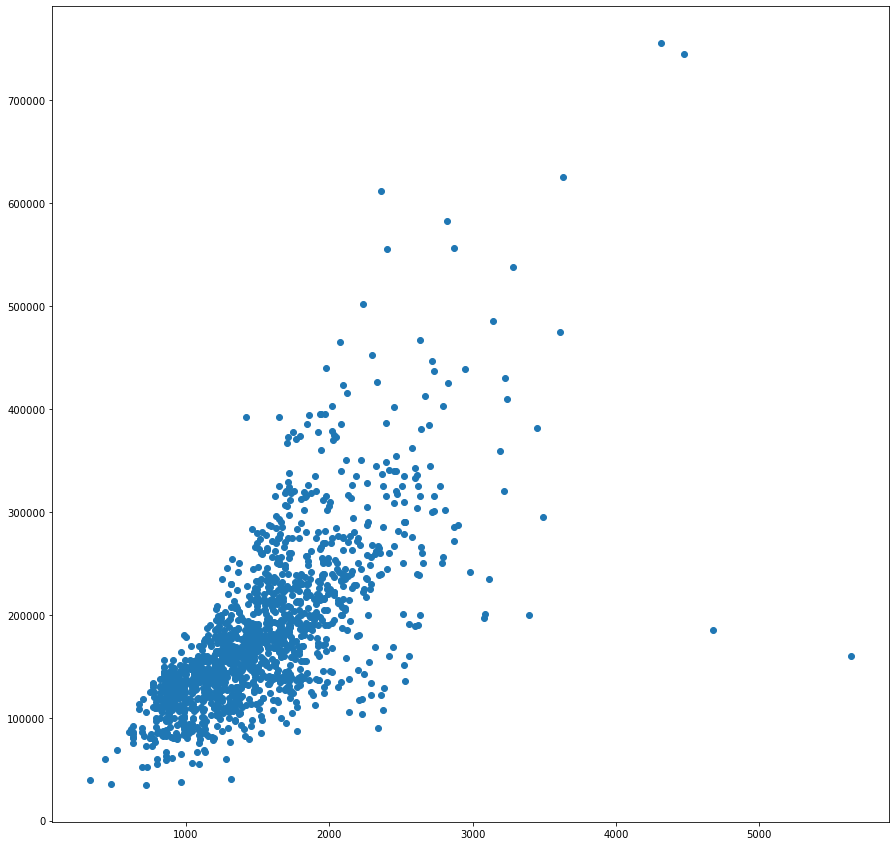

In [48]:
fig,ax = plt.subplots(figsize=(15,15))
ax.scatter(df.GrLivArea,df.SalePrice)

### Modeling

You will apply an inferential modeling process using StatsModels. This means that you are trying to create the best model in terms of variance in `SalePrice` that is explained (i.e. r-squared), not RMSE or some other more user-friendly metric. For this reason you also will not use a train-test split.

You will build **two models — one simple linear regression model and one multiple linear regresssion model** — then you will interpret the model summaries.

There are two relevant components of interpreting the model summaries: model **metrics** such as r-squared and p-values, which tell you how well your model is fit to the data, and model **parameters** (intercept and coefficients), which tell you how the model is using the feature(s) to predict the target.

### Requirements

## 1. Build a Simple Linear Regression Using StatsModels

Below, we use the `.corr()` method to find which features are most correlated with `SalePrice`:

In [2]:
# Run this cell without changes
df.corr()["SalePrice"]

SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
LotArea        0.263843
LotFrontage    0.351799
Name: SalePrice, dtype: float64

The `GrLivArea` feature has the highest correlation with `SalePrice`, so we will use it to build a simple linear regression model.

Recall that the general structure of a StatsModels linear regression model is something like this:

```python
formula = 'y ~ x'
model = ols(formula, df).fit()
summary = model.summary()
```

Where `y` is the name of the target (dependent) variable, `x` is the name of the feature (independent) variable, and `df` is the dataframe containing both `y` and `x`.

In the cell below, fill in the appropriate values to create and summarize a simple linear regression model where `SalePrice` is the target and `GrLivArea` is the feature.

In [19]:
from statsmodels.formula.api import ols

# Replace None with appropriate code
simple_formula = 'SalePrice ~ GrLivArea'
simple_model = ols(formula=simple_formula,data=df).fit()
simple_model_summary = simple_model.summary()
# your code here
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 25 May 2021   Prob (F-statistic):          4.52e-223
Time:                        16:56:59   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
import statsmodels

# simple_model should be a model fit with 1 feature
assert simple_model.df_model == 1

# simple_model_summary should be a StatsModels model summary
assert type(simple_model_summary) == statsmodels.iolib.summary.Summary

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 2. Interpret Simple Linear Regression Model Metrics

We want to know:

1. How much of the variance is explained by this model? This is also known as the r-squared. Fill in `r_squared` with this value — a floating point number between 0 and 1.
2. Is the model statistically significant at $\alpha = 0.05$? This is determined by comparing the probability of the f-statistic to the alpha. Fill in `model_is_significant` with this value — either `True` or `False`.

You can either just look at the print-out above and fill in the values, or you can use attributes of `simple_model` ([documentation here](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)). If you are getting stuck, it's usually easier to type the answer in rather than writing code to do it.

In [40]:
simple_model.rsquared

0.5021486502718042

In [41]:
# Replace None with appropriate code
r_squared = simple_model.rsquared
model_is_significant = False
# your code here


In [42]:
import numpy as np

# r_squared should be a floating point value between 0 and 1
assert 0 <= r_squared and r_squared <= 1
assert type(r_squared) == float or type(r_squared) == np.float64

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

In [43]:
# model_is_significant should be True or False
assert model_is_significant == True or model_is_significant == False

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 3. Interpret Simple Linear Regression Parameters

Now, we want to know what relationship the model has found between the feature and the target. Because this is a simple linear regression, it follows the format of $y = mx + b$ where $y$ is the `SalePrice`, $m$ is the slope of `GrLivArea`, $x$ is `GrLivArea`, and $b$ is the y-intercept (the value of $y$ when $x$ is 0).

In the cell below, fill in appropriate values for `m` and `b`. Again, you can use the print-out above or use attributes of `simple_model`.

In [37]:
simple_model.params[1]

107.13035896582515

In [39]:
# Replace None with appropriate code

# Slope (coefficient of GrLivArea)
m = simple_model.params[1]

# Intercept (coefficient of Intercept)
b = simple_model.params[0]

# your code here

print(f"""
Our simple linear regression model found a y-intercept
of ${round(b, 2)}, then for every increase of 1 square foot
above-ground living area, the price increases by ${round(m, 2)} 
""")


Our simple linear regression model found a y-intercept
of $18569.03, then for every increase of 1 square foot
above-ground living area, the price increases by $107.13 



In [16]:
from numbers import Number

# m should be a number
assert isinstance(m, Number)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

In [17]:
# b should be a number
assert isinstance(b, Number)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

# Sklearn Implementation

Statsmodels.formula.api is great because it gives us such wonderful summary output.  But, as we move through the course, we will rely more on Sklearn's machine learning models.

Recreate the above simple linear regression with sklearn.

In [ ]:
# import LinearRegression from sklearn.linear_model

# Instantiate a LinearRegression object and assign it to the variable `lr`
lr = None



Unlike `statsmodels.formula.api.ols`, sklearn models, we have to separate the target from the features.  



In [ ]:
# Assign the target to `y`, and the feature to `X`. 
y = None
X = None

# Note: y can be a series, X should be a dataframe.


In [ ]:
# Fit the lr object to X and y


The fit `lr` object now has attributes `.coef_` and `.intercept_`. Using dot-notation chained off the lr object, confirm that sklearn and statsmodels creates the same fit.

In [ ]:
# your code here

The fit `lr` object now has attributes `score()` method which takes `X` and `y` as arguments..  Call that method using .dot-notation below.  What does .score() return?

In [ ]:
# Your code here

## 3. Build a Multiple Regression Model Using StatsModels

Now, build a model that contains all of the features present in `df`. Recall that the general process for building a multiple regression model is something like this:

```python
formula = 'y ~ x_1 + x_2 + x_3'
model = ols(formula, df).fit()
summary = model.summary()
```

Where `y` and `df` are the same as in the previous example, but now there are multiple features represented by `x_1`, `x_2`, `x_3`, etc.

Specifically, your model should have `SalePrice` as the target, and these columns as features:

* `GrLivArea`
* `GarageArea`
* `LotArea`
* `LotFrontage`

In [26]:
from statsmodels.formula.api import ols

# Replace None with appropriate code
multiple_formula = 'SalePrice ~ GrLivArea + GarageArea + LotArea + LotFrontage'
multiple_model = ols(multiple_formula,df).fit()
multiple_model_summary = multiple_model.summary()
# your code here
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     476.5
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.11e-245
Time:                        16:58:59   Log-Likelihood:                -14740.
No. Observations:                1201   AIC:                         2.949e+04
Df Residuals:                    1196   BIC:                         2.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.151e+04   5421.192     -2.124      0.034   -2.22e+04    -878.343
GrLivArea      79.5785      3.390     23.473      0.000      72.927      86.230
GarageArea    143.6119      7.833     18.334      0.000     128.244     158.980
LotArea         0.7909      0.212      3.730      0.000       0.375       1.207
LotFrontage   -52.6476     72.856     -0.723      0.470    -195.588      90.293
==============================================================================
Omnibus:                      262.972   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9251.057
Skew:                          -0.120   Prob(JB):                         0.00
Kurtosis:                      16.594   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scaling

For linear regression, scaling the independent variables will not change the quality of the model.  I.E., r^2 will remain constant.

In the next few cells, we will confirm this is true.



In [ ]:
# Import the `StandardScaler` from `sklearn.preprocessing` 


In [ ]:
# Instantiate a StandardScaler object and assign it to ss

ss = None

The ss object has a method .fit_transform() which takes a dataframe of independent features as an argument.  


In [ ]:
# Assign a dataframe of the dependent features we used above to X and assign the target to y

X = None
y = None

In [ ]:
# pass X as an argument to the fit_transform() method call from the ss object

In [ ]:
scaled_features = None

In [ ]:
# Once you have scaled your features, run this cell to prepare the dataframe for statsmodels.formula.api
scaled_feature_df= pd.DataFrame(scaled_features, columns = df.columns[1:], index=df.index)
scaled_df = scaled_feature_df.insert(0,0,y )
scaled_df.rename({0:'SalePrice'}, axis=1,inplace=True)
scaled_df.head()

In [ ]:
# Now, rewrite your code you used to fit your statsmodels multiple regression model
# substituting scaled_df for df.  

# your code here

In [ ]:
# confirm that r^2 has not changed.

# your code here

## 4. Interpret Multiple Regression Model Metrics

Now we want to know: **is our multiple linear regression model a better fit than our simple linear regression model? We'll measure this in terms of percentage of variance explained (r-squared)**, where a higher r-squared indicates a better fit.

Replace `second_model_is_better` with either `True` if this model is better, or `False` if the previous model was better (or the two models are exactly the same).

In [27]:
# Replace None with appropriate code
second_model_is_better = True
# your code here

In [28]:
# second_model_is_better should be True or False
assert second_model_is_better == True or second_model_is_better == False

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

**If we need to drop one feature from this model, which should it be?** Consider the p-values in the print-out above, as well as the correlations shown below.

In [29]:
# Run this cell without changes

# Showing the average correlation with other features
# (including itself). This does NOT include correlations
# with SalePrice, only with other features
correlations = df.drop("SalePrice", axis=1).corr().sum() / 4
correlations

GrLivArea      0.533728
GarageArea     0.498599
LotArea        0.467403
LotFrontage    0.543472
dtype: float64

Replace `feature_to_drop` with the name of the features, which should be one of these four:

* `GrLivArea`
* `GarageArea`
* `LotArea`
* `LotFrontage`

In [31]:
# Replace None with appropriate code
feature_to_drop = 'LotFrontage'
# your code here

In [32]:
# feature_to_drop should be a string
assert type(feature_to_drop) == str

# It should be one of the features in df
assert feature_to_drop in df.columns

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS